In [1]:
import torch
from diffusers import FluxPipeline
from optimum.quanto import freeze, quantize, qfloat8
import time
import ipywidgets

In [2]:
pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
pipe.enable_model_cpu_offload()

In [4]:
start_time = time.time()
image = pipe(
    prompt="modern anime style, a cute Japanese idle singer girl, long black hair, She is singing ,holding a microphone, wearing white idle costume, standing on the stage .This is a flashy concert with 3D holograms and laser effects",
    height=1360,
    width=768,
    guidance_scale=3.5,
    output_type="pil",
    num_inference_steps=20,
    max_sequence_length=512,
    generator=torch.Generator("cpu").manual_seed(1838595651),
    joint_attention_kwargs={"scale": 1.0}
).images[0]
end_time = time.time()
print(f"画像生成時間: {end_time - start_time} 秒")
image.save("flux_no_lora_1838595651.png")

d:\lab\FLUX\flux1-diffusers\.venv\Lib\site-packages\transformers\models\clip\modeling_clip.py:480: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


  0%|          | 0/20 [00:00<?, ?it/s]

画像生成時間: 2282.458992958069 秒


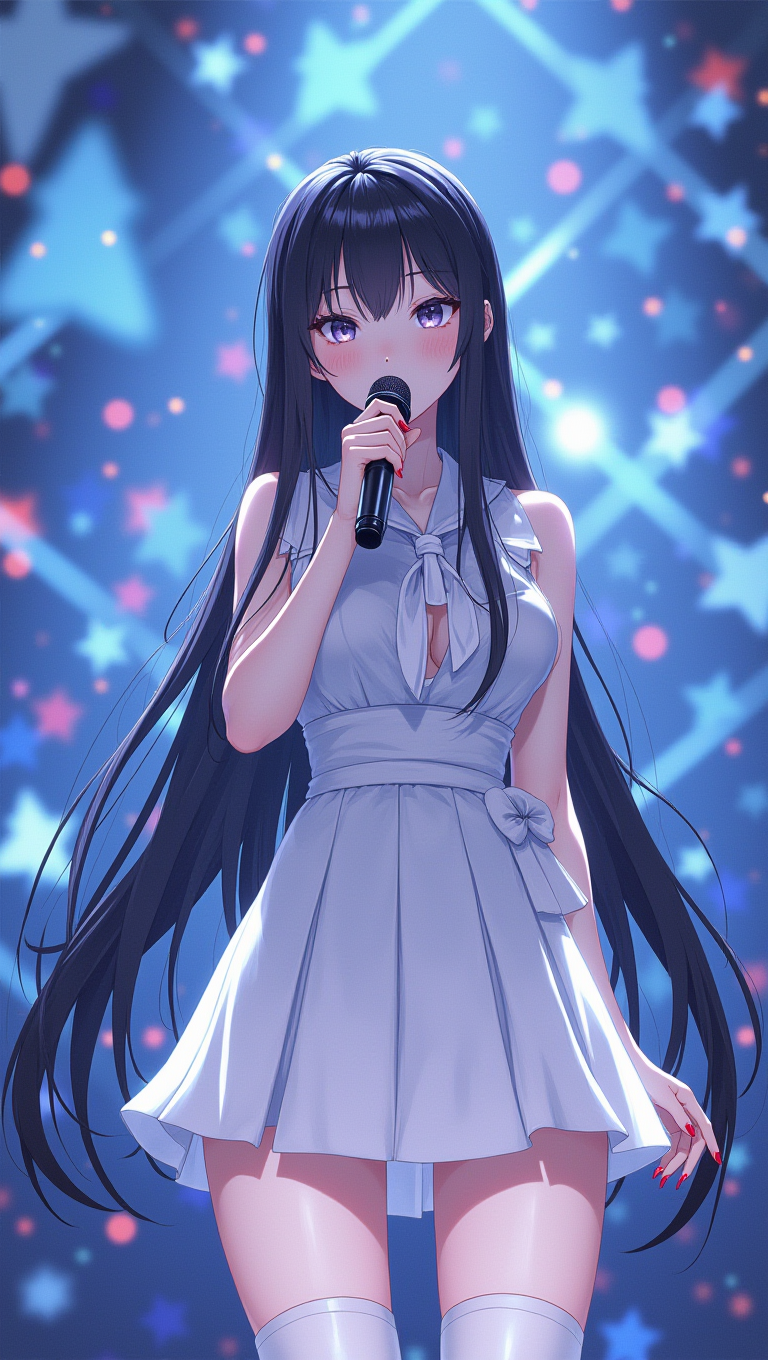

In [5]:
image

In [6]:
pipe.load_lora_weights(
    pretrained_model_name_or_path_or_dict="alfredplpl/flux.1-dev-modern-anime-lora",
    weight_name="modern-anime-lora-2.safetensors"
)

In [7]:
start_time = time.time()
image = pipe(
    prompt="modern anime style, a cute Japanese idle singer girl, long black hair, She is singing ,holding a microphone, wearing white idle costume, standing on the stage .This is a flashy concert with 3D holograms and laser effects",
    height=1360,
    width=768,
    guidance_scale=3.5,
    output_type="pil",
    num_inference_steps=20,
    max_sequence_length=512,
    generator=torch.Generator("cpu").manual_seed(1838595651),
    joint_attention_kwargs={"scale": 1.0}
).images[0]
end_time = time.time()
print(f"画像生成時間: {end_time - start_time} 秒")
image
image.save("flux_modern_anime_lora_1838595651.png")

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
image